In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('../data/train.csv')
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,2,3,1,0,1,244,10,1,0,0,0,85.85,0,1
1,2,0,0,3,1,0,1,276,9,1,0,0,0,95.00,0,1
2,2,0,1,2,1,0,1,233,10,1,0,0,0,90.00,0,1
3,2,0,2,2,1,0,1,156,7,1,0,0,0,93.08,1,1
4,2,0,0,3,1,0,1,76,4,1,0,0,0,69.33,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29015,1,0,2,5,1,0,1,34,11,1,0,0,0,74.80,2,1
29016,2,0,0,2,2,0,1,346,9,0,0,0,0,115.00,1,1
29017,3,0,0,4,1,0,4,175,8,1,0,0,0,130.05,1,1
29018,1,0,0,3,1,0,1,5,12,0,0,0,0,64.80,0,0


In [7]:
X = df
print(X.shape)


(29020, 16)


In [8]:
km_list = [KMeans(n_clusters=k, n_init=10, random_state=0).fit(X) for k in range(2,30)]
km_list

[KMeans(n_clusters=2, n_init=10, random_state=0),
 KMeans(n_clusters=3, n_init=10, random_state=0),
 KMeans(n_clusters=4, n_init=10, random_state=0),
 KMeans(n_clusters=5, n_init=10, random_state=0),
 KMeans(n_clusters=6, n_init=10, random_state=0),
 KMeans(n_clusters=7, n_init=10, random_state=0),
 KMeans(n_init=10, random_state=0),
 KMeans(n_clusters=9, n_init=10, random_state=0),
 KMeans(n_clusters=10, n_init=10, random_state=0),
 KMeans(n_clusters=11, n_init=10, random_state=0),
 KMeans(n_clusters=12, n_init=10, random_state=0),
 KMeans(n_clusters=13, n_init=10, random_state=0),
 KMeans(n_clusters=14, n_init=10, random_state=0),
 KMeans(n_clusters=15, n_init=10, random_state=0),
 KMeans(n_clusters=16, n_init=10, random_state=0),
 KMeans(n_clusters=17, n_init=10, random_state=0),
 KMeans(n_clusters=18, n_init=10, random_state=0),
 KMeans(n_clusters=19, n_init=10, random_state=0),
 KMeans(n_clusters=20, n_init=10, random_state=0),
 KMeans(n_clusters=21, n_init=10, random_state=0),
 K

In [9]:
silhouette_score_list = [silhouette_score(X, model.labels_) for model in km_list]
silhouette_score_list

[0.5749287386228069,
 0.46150429304962676,
 0.3972218200738919,
 0.40381084554807056,
 0.36053874902633837,
 0.3382839442154081,
 0.33691396023218523,
 0.3374548723322839,
 0.36378223665523335,
 0.3676797555086565,
 0.3606898054121998,
 0.3461199048194939,
 0.3456918049453972,
 0.34868417230700305,
 0.348766416815088,
 0.3429970639367019,
 0.3473250012046457,
 0.3375575915745949,
 0.33985063799180676,
 0.3381529574915567,
 0.3370483990763668,
 0.33985826684925935,
 0.3358741158815016,
 0.3390685070568063,
 0.33234902282788026,
 0.32693201170109887,
 0.3318833531418861,
 0.32939951298457915]

Text(0, 0.5, 'silhouette_score')

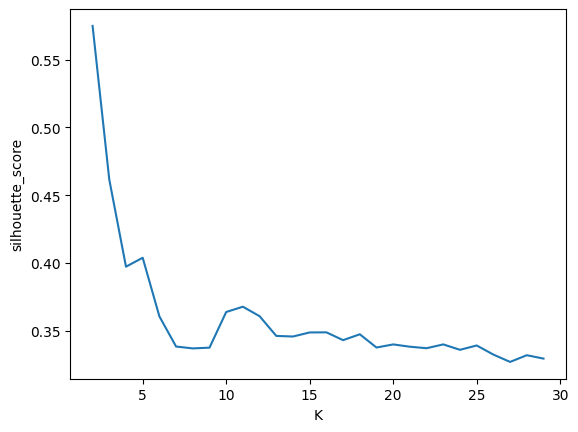

In [10]:
plt.plot(range(2,30), silhouette_score_list)
plt.xlabel('K')
plt.ylabel('silhouette_score')

Text(0, 0.5, 'inertias')

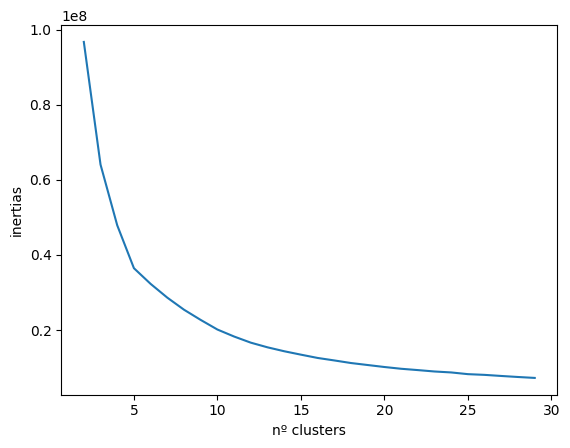

In [11]:
inertias = [model.inertia_ for model in km_list]
plt.plot(range(2,30), inertias)
plt.xlabel('nº clusters')
plt.ylabel('inertias')

PIEPLOT

In [12]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0).fit(X)
kmeans.labels_

array([0, 0, 0, ..., 0, 1, 1])

In [13]:
df_clusters = pd.DataFrame(kmeans.labels_, columns=['Cluster'])
df_clusters

,Cluster
0,0
1,0
2,0
3,0
4,1
...,...
29015,1
29016,0
29017,0
29018,1


In [14]:
df_clusters['Cluster'].value_counts()

Cluster
1    21897
0     7123
Name: count, dtype: int64

<Axes: ylabel='count'>

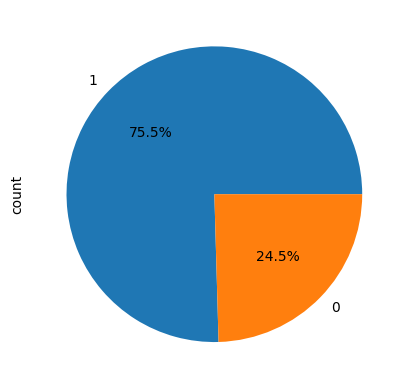

In [15]:
df_clusters['Cluster'].value_counts().plot.pie(autopct="%.1f%%")

In [16]:
X['cluster'] = kmeans.labels_

In [20]:
X['cluster'].unique()

array([5, 0, 4, 2, 7, 1, 3, 6])

In [17]:
kmeans = KMeans(n_clusters=8, n_init=10, random_state=0).fit(X)
X['cluster'] = kmeans.labels_
X.groupby('cluster').mean()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
cluster,,,,,,,,,,,,,,,,
0,1.877954,0.095819,0.961049,2.543755,0.957154,0.021553,1.547650,161.576993,7.537003,0.640353,0.001298,0.013503,0.001298,101.421652,0.574916,0.546352
1,1.606411,0.039537,0.721638,1.907035,0.817275,0.040249,1.319145,17.349065,6.763491,1.063402,0.109528,0.100801,0.739270,69.826046,0.479252,0.106144
2,1.882199,0.019197,0.597731,2.299302,1.395288,0.000873,1.120419,326.496510,9.218150,0.279232,0.004363,0.004363,0.000000,94.535009,0.342059,0.808028
3,1.820542,0.063443,0.722375,1.967873,0.868084,0.036995,1.651955,21.441668,7.510952,0.920493,0.017199,0.009573,0.047704,114.488747,0.742820,0.188707
4,1.846154,0.037327,0.905548,2.323159,0.940194,0.014024,1.313879,82.982471,7.024335,0.644257,0.005981,0.005156,0.038565,83.964985,0.542999,0.277377
5,1.891817,0.055479,0.906611,2.548313,1.101248,0.014794,1.293111,241.843736,8.300046,0.511789,0.001387,0.001849,0.003236,95.700583,0.442903,0.709663
6,2.048290,0.197854,0.860496,2.466130,1.047954,0.036217,2.591214,92.146881,7.534876,0.830651,0.000000,0.000000,0.000000,133.721237,0.763917,0.403421
7,2.104398,0.513994,0.760551,1.995558,1.038649,0.061306,3.545091,21.800977,7.722790,0.978676,0.003554,0.000000,0.006664,173.742732,0.964460,0.271879
